In [975]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta
from datetime import datetime

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from numpy import NaN

In [858]:
CURRENT_LOCATION = "bolz"

In [1048]:
path_to_file = 'APPA_data_merged.csv'
df = pd.read_csv(path_to_file, parse_dates=["Data"])
df_bolz_pm10 = df[(df.Stazione == "Via Bolzano") & (df.Inquinante == "Biossido di Azoto")]

In [1049]:
station_list = df.Stazione.unique()
pollutants_per_station = {}
for st in station_list:
    pollutants_per_station[st] = df[df.Stazione == st].Inquinante.unique().tolist()

pollutants_per_station

{'A22 (Avio)': ['Biossido di Azoto', 'Ossido di Carbonio', 'PM10'],
 'Borgo Valsugana': ['Biossido di Azoto', 'Ozono', 'PM10', 'PM2.5'],
 'Monte Gaza': ['Biossido di Azoto', 'Ozono', 'PM10'],
 'Parco S. Chiara': ['Biossido Zolfo',
  'Biossido di Azoto',
  'Ozono',
  'PM10',
  'PM2.5'],
 'Piana Rotaliana': ['Biossido di Azoto', 'Ozono', 'PM10'],
 'Riva del Garda': ['Biossido di Azoto', 'Ozono', 'PM10'],
 'Rovereto': ['Biossido di Azoto', 'Ozono', 'PM10', 'PM2.5'],
 'Via Bolzano': ['Biossido di Azoto', 'Ossido di Carbonio', 'PM10']}

In [1050]:
def get_daily(station, polutant):
    to_return = df[(df.Stazione == station) & (df.Inquinante == polutant)]
    to_return = to_return.resample('D', on="Data").mean()
    to_return = to_return.reset_index()
    return to_return

In [1051]:
Bolzano_PM10 = get_daily("Via Bolzano", "PM10")
Bolzano_PM10


,Data,Valore
0,2012-01-01,55.727273
1,2012-01-02,62.291667
2,2012-01-03,36.708333
3,2012-01-04,33.041667
4,2012-01-05,26.375000
...,...,...
3837,2022-07-04,16.250000
3838,2022-07-05,9.291667
3839,2022-07-06,9.875000
3840,2022-07-07,14.875000


In [1052]:
def plot_st_pol(station, pollutant):
    pass


Makes the daily mean from the hour values

In [1053]:
df_daily = df_bolz_pm10.resample("D", on='Data').mean()
df_daily = df_daily.reset_index()

In [1054]:
df_daily.head()

,Data,Valore
0,2012-01-01,59.869565
1,2012-01-02,68.458333
2,2012-01-03,64.958333
3,2012-01-04,57.833333
4,2012-01-05,61.208333


In [1055]:
weather_file_path = "weather_data.csv"
weather_df = pd.read_csv(weather_file_path, parse_dates=["Data"])

In [1056]:
locations = list(set(weather_df.columns[1:].map(lambda x: x.split()[0])))
locations

['rg', 'bolz', 'parco', 'borgo', 'piana', 'avio', 'rov', 'mgazza']

In [1057]:
weather_loc = {}

for location in locations:
    location_columns = weather_df.columns[
        weather_df.columns.map(lambda x: x.split()[0] == location)
    ]

    location_df = weather_df[["Data"] + location_columns.tolist()]
    location_df.columns = location_df.columns.str.replace(location, "").str.strip()
    location_df["Location"] = location
    
    weather_loc[location] = location_df


C:\Users\thoma\AppData\Local\Temp\ipykernel_3592\2564517573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df["Location"] = location
C:\Users\thoma\AppData\Local\Temp\ipykernel_3592\2564517573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df["Location"] = location
C:\Users\thoma\AppData\Local\Temp\ipykernel_3592\2564517573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [1058]:
df_weather_long = pd.concat(weather_loc.values())
# df_weather_long.to_csv("./weather_long_format.csv", index=None)

In [1059]:
merged_df = df_daily.join(
    df_weather_long[df_weather_long.Location == CURRENT_LOCATION].set_index("Data"), 
    on="Data"
)
merged_df

,Data,Valore,rain,temp,Location,hum,w_dir,w_sp,press,sol
0,2012-01-01,59.869565,0.0,0.0,bolz,78.6,342.0,0.7,995.5,6433.5
1,2012-01-02,68.458333,15.0,-0.4,bolz,95.0,348.0,1.0,994.7,1154.3
2,2012-01-03,64.958333,0.6,3.6,bolz,86.8,329.0,1.8,997.5,7082.0
3,2012-01-04,57.833333,0.0,0.1,bolz,90.0,337.0,1.0,993.7,3149.2
4,2012-01-05,61.208333,0.0,1.0,bolz,79.8,343.0,1.5,980.3,5839.9
...,...,...,...,...,...,...,...,...,...,...
3837,2022-07-04,18.208333,7.0,23.2,bolz,70.6,315.0,3.7,991.4,16440.8
3838,2022-07-05,19.250000,0.0,24.9,bolz,59.5,330.0,2.9,989.0,25228.8
3839,2022-07-06,20.083333,0.0,25.2,bolz,54.2,336.0,2.0,990.8,28751.0
3840,2022-07-07,24.500000,4.0,23.5,bolz,62.2,296.0,1.3,989.6,19994.8


In [1060]:
# add column for the value of the previous day
weather_parameters = ['rain', 'temp', 'press', 'hum', 'w_dir', 'w_sp', 'sol']
prev_day_values = {}
for par in weather_parameters:
    for i in range(1, 8):
        prev_day_values[f"{par} {i} day/s earlier"]  = []
        for date in merged_df["Data"]:
            prev_day = date - timedelta(hours=int(24 * i))
            series = merged_df[merged_df.Data == prev_day][par].values.tolist()
            #print(series)
            if len(series) > 0:
                value = series[0]
            else:
                value = NaN  # takes the current day, not the previous
            prev_day_values[f"{par} {i} day/s earlier"].append(value)

        merged_df[f"{par} {i} day/s earlier"] = prev_day_values[f'{par} {i} day/s earlier']

In [1061]:
merged_df = merged_df.dropna()

In [1062]:
merged_df.isna().sum()

Data                     0
Valore                   0
rain                     0
temp                     0
Location                 0
hum                      0
w_dir                    0
w_sp                     0
press                    0
sol                      0
rain 1 day/s earlier     0
rain 2 day/s earlier     0
rain 3 day/s earlier     0
rain 4 day/s earlier     0
rain 5 day/s earlier     0
rain 6 day/s earlier     0
rain 7 day/s earlier     0
temp 1 day/s earlier     0
temp 2 day/s earlier     0
temp 3 day/s earlier     0
temp 4 day/s earlier     0
temp 5 day/s earlier     0
temp 6 day/s earlier     0
temp 7 day/s earlier     0
press 1 day/s earlier    0
press 2 day/s earlier    0
press 3 day/s earlier    0
press 4 day/s earlier    0
press 5 day/s earlier    0
press 6 day/s earlier    0
press 7 day/s earlier    0
hum 1 day/s earlier      0
hum 2 day/s earlier      0
hum 3 day/s earlier      0
hum 4 day/s earlier      0
hum 5 day/s earlier      0
hum 6 day/s earlier      0
h

In [ ]:
merged_df.corr()

In [ ]:
merged_df.describe()

In [ ]:
merged_df = merged_df.dropna()
merged_df

In [1066]:
from sklearn.model_selection import train_test_split

In [1067]:
input_columns = [
    'rain', 
    'temp', 
    'hum', 
    'w_dir', 
    'w_sp', 
    'press', 
    'sol',
    #'Prev day'
]

for i in range (1, 8):
    for par in weather_parameters:
        input_columns.append(f"{par} {i} day/s earlier")

X = merged_df[input_columns]
y = merged_df['Valore']

In [1068]:
test_years = [2015, 2017]
train_years = [2012, 2013, 2014, 2016, 2018, 2019, 2020, 2021, 2022]




In [1069]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

In [1070]:
X_train, y_train, X_test, y_test = (
    X[merged_df.Data.dt.year.isin(train_years)],
    y[merged_df.Data.dt.year.isin(train_years)],
    X[merged_df.Data.dt.year.isin(test_years)],
    y[merged_df.Data.dt.year.isin(test_years)]
)

In [1071]:
X.shape

(3788, 56)

# ---- START OF RANDOM FOREST ----

In [1072]:
from sklearn.ensemble import RandomForestRegressor
SEED = 42

In [1073]:
X_train.shape

(3076, 56)

In [1074]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = SEED)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1075]:
score = regressor.score(X_train, y_train)
print("R2:", score)

R2: 0.9629186337032115


In [1076]:
y_pred = regressor.predict(X_test)

In [1077]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

         Actual  Predicted
1096  59.666667  76.993933
1097  61.666667  76.328333
1098  73.250000  72.375097
1099  44.625000  58.776021
1100  84.916667  75.942344
...         ...        ...
2187  74.041667  72.392202
2188  51.772727  43.230412
2189  45.500000  48.139622
2190  52.125000  58.692052
2191  64.250000  75.161982

[712 rows x 2 columns]


In [1078]:
results.corr()

,Actual,Predicted
Actual,1.000000,0.883591
Predicted,0.883591,1.000000


In [1079]:
test_chart_data = merged_df[
    merged_df.Data.dt.year.isin(test_years)
]
test_chart_data["pred"] = regressor.predict(test_chart_data[input_columns])

C:\Users\thoma\AppData\Local\Temp\ipykernel_3592\643691821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chart_data["pred"] = regressor.predict(test_chart_data[input_columns])


In [1080]:
X_train

,rain,temp,hum,w_dir,w_sp,press,sol,rain 1 day/s earlier,temp 1 day/s earlier,press 1 day/s earlier,...,w_dir 6 day/s earlier,w_sp 6 day/s earlier,sol 6 day/s earlier,rain 7 day/s earlier,temp 7 day/s earlier,press 7 day/s earlier,hum 7 day/s earlier,w_dir 7 day/s earlier,w_sp 7 day/s earlier,sol 7 day/s earlier
7,0.0,3.9,61.6,348.0,2.5,990.6,7850.6,0.0,1.5,991.4,...,348.0,1.0,1154.3,0.0,0.0,995.5,78.6,342.0,0.7,6433.5
8,0.0,3.5,60.6,330.0,1.5,997.2,7607.4,0.0,3.9,990.6,...,329.0,1.8,7082.0,15.0,-0.4,994.7,95.0,348.0,1.0,1154.3
9,0.0,4.1,56.8,349.0,1.9,1001.2,8116.0,0.0,3.5,997.2,...,337.0,1.0,3149.2,0.6,3.6,997.5,86.8,329.0,1.8,7082.0
10,0.0,2.1,65.6,342.0,0.8,1005.3,7614.8,0.0,4.1,1001.2,...,343.0,1.5,5839.9,0.0,0.1,993.7,90.0,337.0,1.0,3149.2
11,0.0,0.6,80.6,336.0,0.6,1001.4,7700.2,0.0,2.1,1005.3,...,333.0,3.0,7149.7,0.0,1.0,980.3,79.8,343.0,1.5,5839.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,7.0,23.2,70.6,315.0,3.7,991.4,16440.8,0.0,27.8,990.2,...,320.0,2.2,11866.2,0.0,27.5,988.2,52.8,273.0,2.3,25786.5
3838,0.0,24.9,59.5,330.0,2.9,989.0,25228.8,7.0,23.2,991.4,...,306.0,2.2,16878.8,1.8,23.6,988.5,68.1,320.0,2.2,11866.2
3839,0.0,25.2,54.2,336.0,2.0,990.8,28751.0,0.0,24.9,989.0,...,279.0,2.3,26393.4,3.6,23.0,985.2,74.3,306.0,2.2,16878.8
3840,4.0,23.5,62.2,296.0,1.3,989.6,19994.8,0.0,25.2,990.8,...,272.0,2.3,21259.8,0.0,25.5,985.1,63.0,279.0,2.3,26393.4


<AxesSubplot:xlabel='Data'>

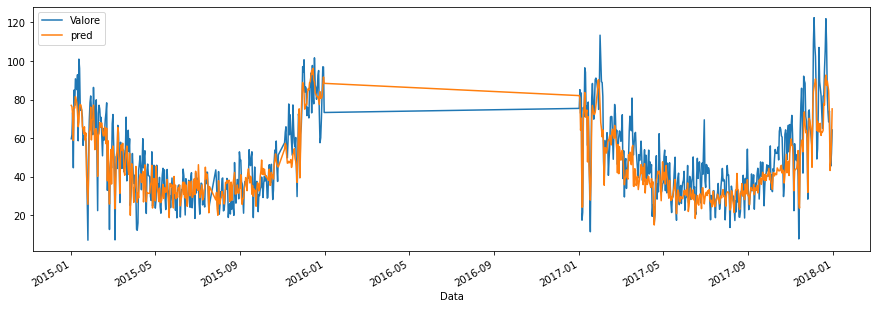

In [1081]:
fig, ax = plt.subplots(figsize=(15, 5))
test_chart_data.plot("Data", "Valore", ax=ax)
test_chart_data.plot("Data", "pred", ax=ax)

(-5.0, 105.0)

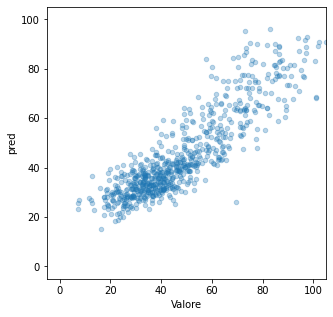

In [1082]:
fig, ax = plt.subplots(figsize=(5, 5))
test_chart_data.plot.scatter("Valore", "pred", alpha=0.3, ax=ax)
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)

In [1083]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8.11
Mean squared error: 107.04
Root mean squared error: 10.35


In [1084]:
regressor.score(X_test, y_test)

0.7561016866093277

In [1085]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.7561016866093281


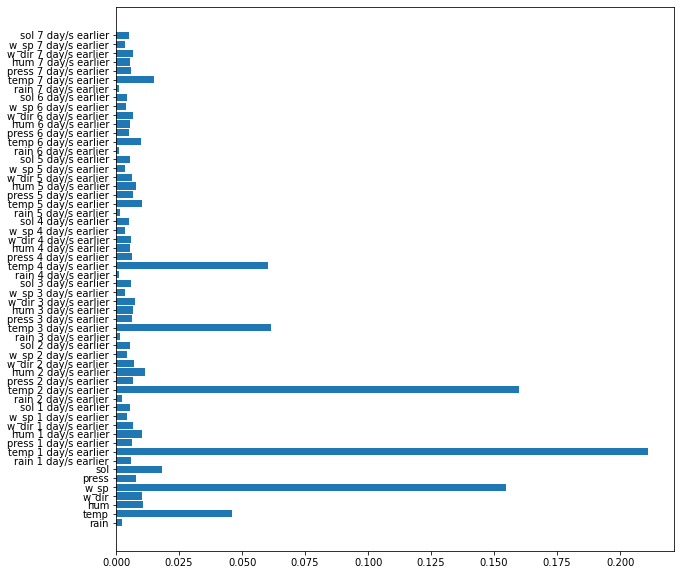

In [1086]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, regressor.feature_importances_)
plt.show()

In [1087]:
input_columns[22]

'temp 3 day/s earlier'

In [1095]:
input_columns

['rain',
 'temp',
 'hum',
 'w_dir',
 'w_sp',
 'press',
 'sol',
 'rain 1 day/s earlier',
 'temp 1 day/s earlier',
 'press 1 day/s earlier',
 'hum 1 day/s earlier',
 'w_dir 1 day/s earlier',
 'w_sp 1 day/s earlier',
 'sol 1 day/s earlier',
 'rain 2 day/s earlier',
 'temp 2 day/s earlier',
 'press 2 day/s earlier',
 'hum 2 day/s earlier',
 'w_dir 2 day/s earlier',
 'w_sp 2 day/s earlier',
 'sol 2 day/s earlier',
 'rain 3 day/s earlier',
 'temp 3 day/s earlier',
 'press 3 day/s earlier',
 'hum 3 day/s earlier',
 'w_dir 3 day/s earlier',
 'w_sp 3 day/s earlier',
 'sol 3 day/s earlier',
 'rain 4 day/s earlier',
 'temp 4 day/s earlier',
 'press 4 day/s earlier',
 'hum 4 day/s earlier',
 'w_dir 4 day/s earlier',
 'w_sp 4 day/s earlier',
 'sol 4 day/s earlier',
 'rain 5 day/s earlier',
 'temp 5 day/s earlier',
 'press 5 day/s earlier',
 'hum 5 day/s earlier',
 'w_dir 5 day/s earlier',
 'w_sp 5 day/s earlier',
 'sol 5 day/s earlier',
 'rain 6 day/s earlier',
 'temp 6 day/s earlier',
 'press 6 da

In [ ]:
prev_val = test_chart_data.iloc[-365].Valore

predictions1 = []
predictions2 = []
predictions3 = []

for i, row in test_chart_data.iloc[-365:].iterrows():
    row_array = row[input_columns].to_numpy()
    
    data_index = 4
    change_value = 1

    result1 = regressor.predict([row_array])[0]  # takes the predicted value
    
    for i in range(8):
        row_array[data_index + 7*i] += change_value
    result2 = regressor.predict([row_array])[0]  # takes the predicted value + 1 value

    for i in range(8):
        row_array[data_index + 7*i] -= change_value*2  # multiply by 2 because before it we added the same value
    result3 = regressor.predict([row_array])[0]  # takes the predicted value - 1

    predictions1.append(result1)
    predictions2.append(result2)
    predictions3.append(result3)

In [1135]:
data = {}

diff_df = pd.DataFrame(data)
diff_df["val3"] = predictions3
diff_df["val1"] = predictions1
diff_df["val2"] = predictions2

#diff_df["diff"] = diff_df["val1"] - diff_df["val2"]

diff_df

,val3,val1,val2
0,94.351019,88.397150,68.086575
1,83.124186,82.048769,64.738473
2,83.868756,80.835832,65.785569
3,75.651369,64.092126,42.562596
4,77.188959,70.362088,48.250598
...,...,...,...
360,77.514806,72.392202,63.411892
361,58.544306,43.230412,41.244514
362,58.297373,48.139622,40.420057
363,65.715430,58.692052,42.908471


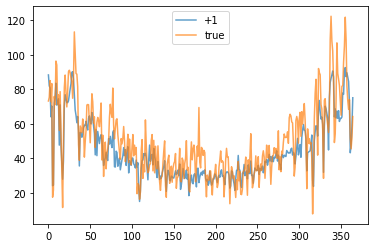

In [1136]:
# NOT modified values

plt.plot(predictions1, label = f"+{change_value}", alpha=0.7)
plt.plot(test_chart_data.iloc[-365:].Valore.to_numpy(), label="true", alpha=0.7)
#plt.plot(predictions3, label =f"-{change_value}", color="red", alpha=0.7)
plt.legend()
plt.show()

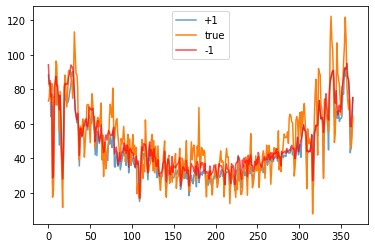

In [1137]:
# Changed values
plt.plot(predictions1, label = f"+{change_value}", alpha=0.7)
plt.plot(test_chart_data.iloc[-365:].Valore.to_numpy(), label="true")
plt.plot(predictions3, label =f"-{change_value}", color="red", alpha=0.7)
plt.legend()
plt.show()

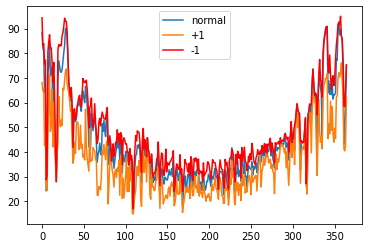

In [1138]:
# Difference between real values and modified vales

plt.plot(predictions1, label="normal")
plt.plot(predictions2, label = f"+{change_value}")
plt.plot(predictions3, label = f"-{change_value}", color="red")
plt.legend()
plt.show()

In [1139]:
# # Plot of a certain value

# plt.plot(test_chart_data.iloc[-365:]["temp"].to_numpy())
# plt.show()


In [1140]:
#plt.scatter(test_chart_data["temp"], test_chart_data["Valore"], alpha=0.3)

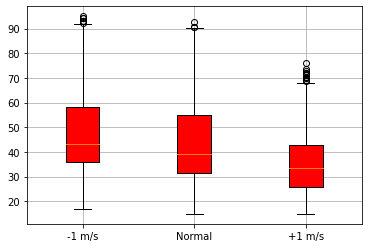

In [1142]:
colors = ["red", "red", "red"]
bp = plt.boxplot(diff_df, patch_artist=True)
plt.xticks([1, 2, 3], ['-1 m/s', 'Normal', '+1 m/s'])

for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.grid()